In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [12]:
data = pd.read_csv('advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


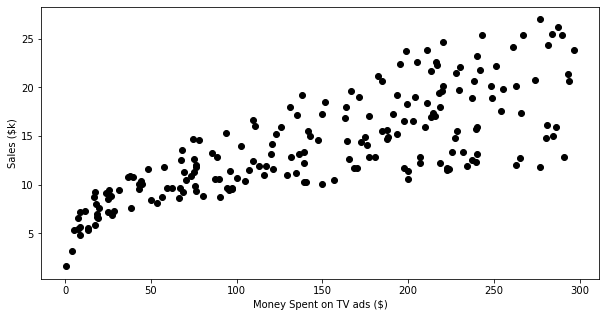

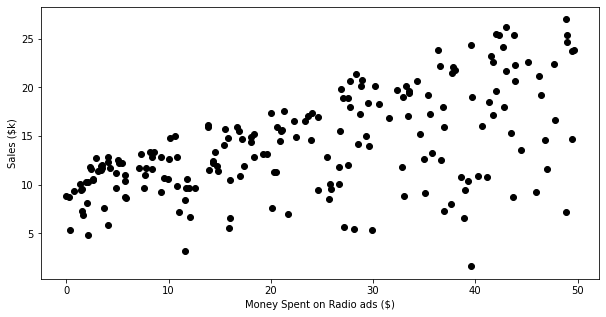

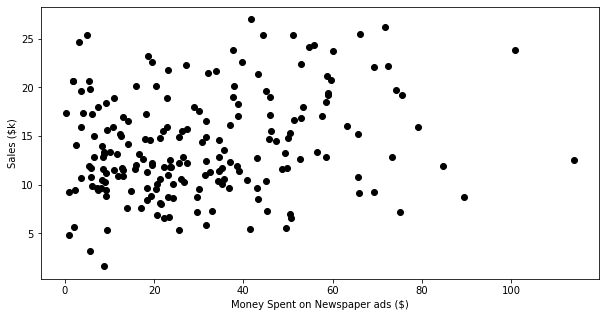

In [18]:
def scatter_plot(feature, target):
    plt.figure(figsize=(10, 5))
    plt.scatter(data[feature],
                data[target],
                c='black'
                )
    plt.xlabel("Money Spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()
scatter_plot("TV", "Sales")
scatter_plot("Radio", "Sales")
scatter_plot("Newspaper", "Sales")

In [26]:
X = data.drop(['Sales'], axis=1)
y = data['Sales'].values

In [28]:
lr = LinearRegression()
MSE = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
print(np.mean(MSE))

-3.072946597100209


In [55]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 50]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 50]},
             scoring='neg_mean_squared_error')

In [60]:
print(ridge_regression.best_params_)
# cross validation score for the best model
print(ridge_regression.best_score_)

{'alpha': 50}
-3.0722711072745588
